In [4]:
import pandas as pd 
import numpy as np 


**Importing the data**

In [5]:
# Load the data
raw_csv_data = pd.read_csv("Index2018.csv")

In [6]:
# Create a copy of the data so if altered we can still have the complete data
df_comp = raw_csv_data.copy()

**Examining the data**

In [7]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


Dates are used as indexes for time series data

In [8]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


Checking the number of null values per column

In [9]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Ploting the data**

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

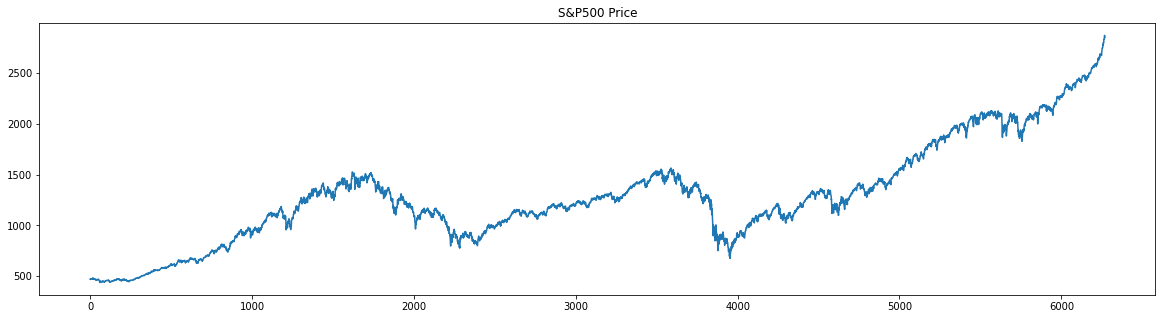

In [11]:
df_comp["spx"].plot(figsize=(20, 5), title = "S&P500 Price")
plt.show()

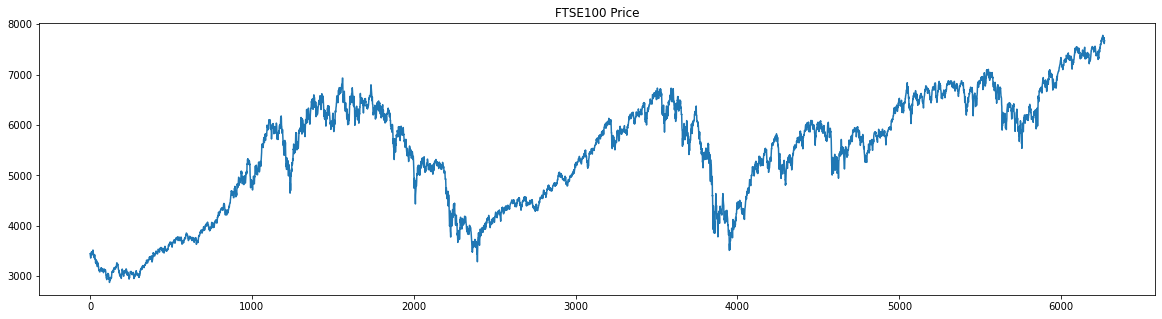

In [12]:
df_comp["ftse"].plot(figsize=(20, 5), title = "FTSE100 Price")
plt.show()

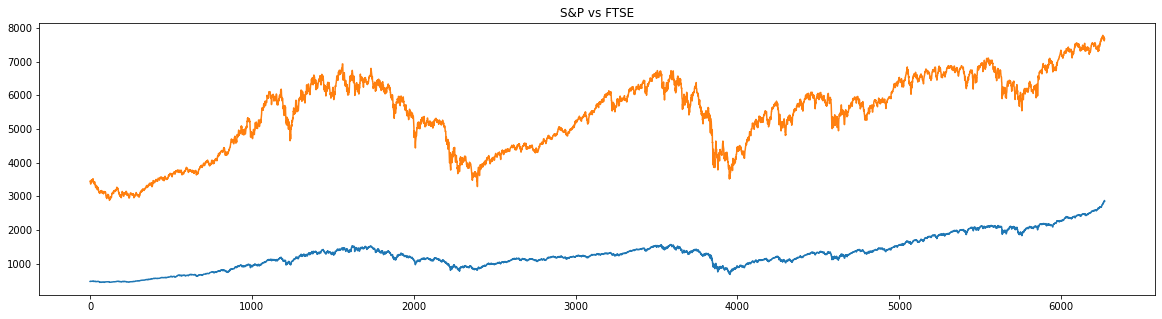

In [13]:
df_comp["spx"].plot(figsize=(20, 5), title = "S&P500 Price")
df_comp["ftse"].plot(figsize=(20, 5), title = "FTSE100 Price")
plt.title("S&P vs FTSE")
plt.show()

**The QQ Plot**

- QQ Plot is a Quantile-Quantile Plot.
- Used to determine if the data set is distributed a certain way.
- Usually showcases how the data fits a Normal Distribution.
- The red line shows if the data was normally distributed and blue is the data.

In [14]:
import scipy.stats
import pylab

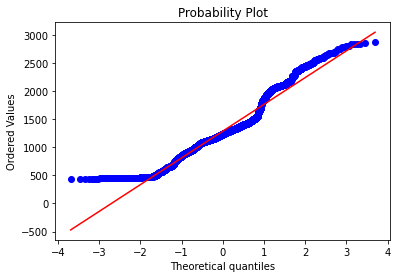

In [15]:
scipy.stats.probplot(df_comp["spx"], plot = pylab)
pylab.show()

## **Converting the data into a time series**

**Length of the time period**

In [16]:
df_comp = raw_csv_data.copy()

In [17]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


The date column is not numeric and will not included in the describe () return.

In [18]:
df_comp["date"].describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

**From text to date time**

In [19]:
df_comp['date'] = pd.to_datetime(df_comp['date'], dayfirst=True)

In [20]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [21]:
df_comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


Setting the index

In [22]:
df_comp.set_index('date', inplace=True)


In [23]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Setting the desired frequency for the dataset**
- The `asfreq('d)` method will add new rows for dates that were missed by the data. These dates represents weekends, the dates in which financial data is not recorded.
- The `asfeq('b')` method will only recognise the business days.

In [24]:
df_comp = df_comp.asfreq('b') #d for daily #b for business days
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Handling missing Values**
- The data contains 8 missing values

We can handle the missing values as follows: Using the `fillna()` method
1. Front filling: - Assign the value of the previous period. (`method = ffill`)
2. Back filling: - Assign the value of the next period.
3. Assigning the same value: - Assigning the average to all the missing values within the time-series.

In [25]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [26]:
# Front fill the missing values for SPX
df_comp['spx'] = df_comp['spx'].fillna(method='ffill')

In [27]:
# Check how many are still missing
df_comp.isna().sum()
# spx has no missing values but the others still have 8 missing values

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [28]:
# Back fill the missing values for FTSE
df_comp['ftse'] = df_comp['ftse'].fillna(method='bfill')

In [29]:
# Check how many are still missing
df_comp.isna().sum()
# spx and ftse have no missing values but the others still have 8 missing values

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [30]:
# Use averages values to fill the missing values for DAX
df_comp['dax'] = df_comp['dax'].fillna(value=df_comp['dax'].mean())

In [31]:
# Check how many are still missing
df_comp.isna().sum()
# spx, ftse and dax have no missing values but nikkei still have 8 missing values

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [32]:
# Use averages values to fill the missing values for DAX
df_comp['nikkei'] = df_comp['nikkei'].fillna(value=df_comp['nikkei'].median())

In [33]:
# Check how many are still missing
df_comp.isna().sum()
# We have no missing values for all the stocks

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

**Adding and removing clumns in a dataset**

In [34]:
df_comp["market_value"] = df_comp['spx']

In [35]:
del df_comp["spx"]
del df_comp["dax"]
del df_comp["ftse"]
del df_comp["nikkei"]



In [36]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


**Splitting the data**
- For machine learning the data is shuffled before it is split to ensure the sets are representative.
- For time series data the suffling is not done because TS relies on the chronological order of the data
- 80/20 split will be used.
- `.iloc[]` will be used to split the data

In [37]:
size = int(len(df_comp)*0.8) # 80% of the data

In [38]:
df = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [39]:
# Check if there is no overlap between testing and training data
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [40]:
# The training data ended on 2013-04-05 while the testing data starts on 2013-04-08. This is fine as 06 and 07 are weeekends.
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### **White Noise**
- A sequence of random data where every value has a time-period associated with it.
- The data doesn't follow a pattern.
- White noise cannot be predicted into the future.

**3 conditions of white noise**
1. Constant mean
2. Constant Variance
3. No autocorrelation in any period

It is important to distinguish while noise data to regular time series data.

**Auto Correlation**
- Measures how correlated a series is with the latter version of itself.
- No autocorrelation means that there is no clear relationship between past and present values.

In financial modelling it is important to seperate white noise data to regular time series data.

In [42]:
# Generating the white noise data
wn = np.random.normal(loc = df.market_value.mean(), scale = df.market_value.std(), size = len(df))

In [44]:
df['wn'] = wn 

/tmp/ipykernel_32701/1708125088.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [45]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1092.280667
std,292.559287,287.189627
min,438.920000,16.735494
25%,914.620000,892.561045
50%,1144.650000,1095.523628
75%,1316.280729,1287.966988
max,1570.252238,2112.481818


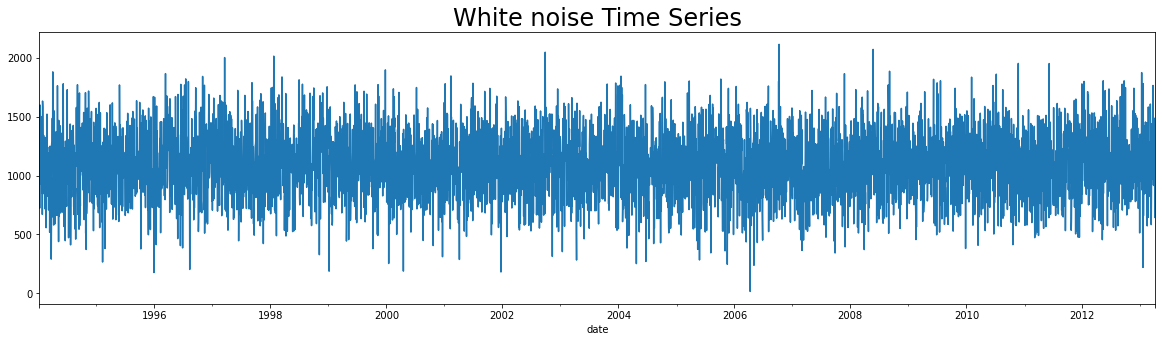

In [46]:
# Plot to see the effect of white noise data

df['wn'].plot(figsize=(20, 5))
plt.title("White noise Time Series", size=24)
plt.show()

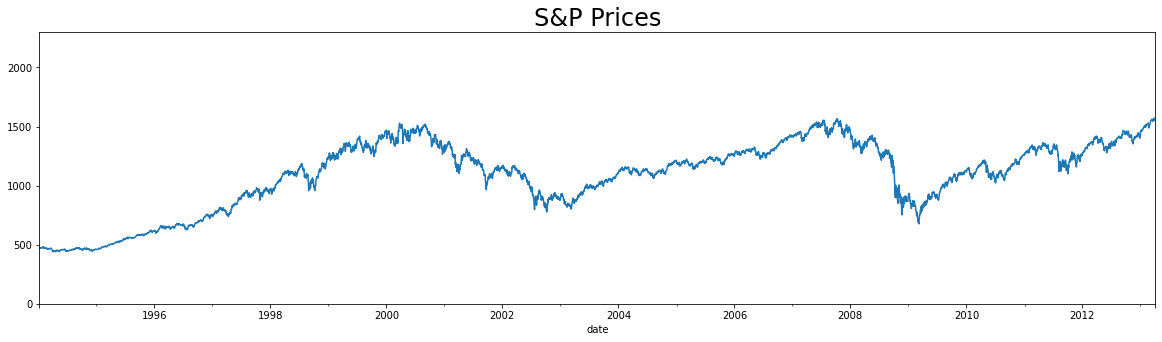

In [49]:
df['market_value'].plot(figsize=(20, 5))
plt.title("S&P Prices", size=24)
plt.ylim(0, 2300)
plt.show()

### **Random Walk Time Series**
- A random walk is a special type of time series, where values tend to persist over time and the differences between periods are simply white noise.


In [53]:
rw = pd.read_csv('RandWalk.csv')
rw['date'] = pd.to_datetime(rw['date'], dayfirst = True)
rw.set_index('date', inplace = True)
rw = rw.asfreq('b')
rw.head()

,price
date,
1994-01-07,1122.139662
1994-01-10,1080.347860
1994-01-11,1082.095245
1994-01-12,1083.639265
1994-01-13,1067.146255


In [55]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [56]:
df['rw'] = rw['price']
df.head()

/tmp/ipykernel_32701/1271250952.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rw'] = rw['price']


,market_value,wn,rw
date,,,
1994-01-07,469.90,1440.049101,1122.139662
1994-01-10,475.27,723.494837,1080.347860
1994-01-11,474.13,1598.568739,1082.095245
1994-01-12,474.17,1217.308417,1083.639265
1994-01-13,472.47,931.670977,1067.146255


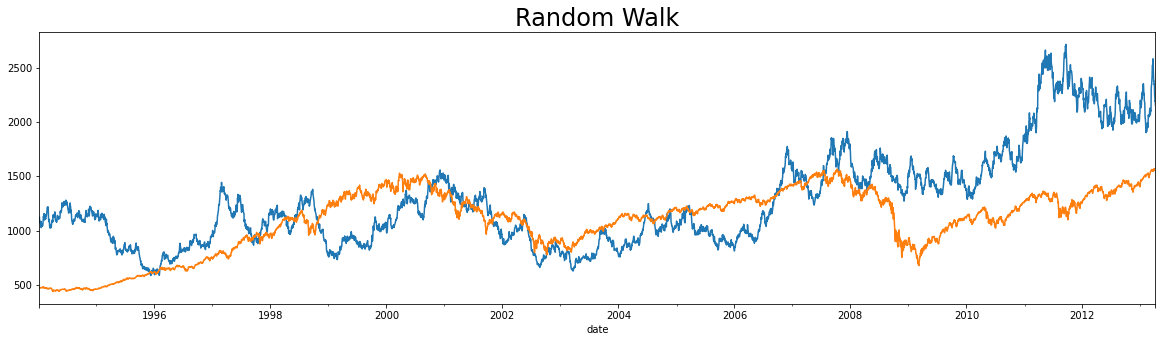

In [59]:
df['rw'].plot(figsize = (20, 5))
df['market_value'].plot()
plt.title('Random Walk', size = 24)
plt.show()

**Market efficiency**
- Measures the level of difficulty in forecasting correct future values

Theory:
- If a time series presents a Random Walk, the prices cannot be predicted with best accuracy.
- If future prices cannot be predicted with best accuracy, there are arbitrage opportunities.

### **Stationarity**
- Time series stationarity implies that taking consecutive samples of data with the same size should have identical co-variances regardless of the starting point.
- This is called `weak-form stationarity` or `covariance stationarity`

**Covariance Stationarity**
- Constant Mean
- Constant Variance
- Consistent covariance between periods at an identical distance from another.

An example of weak-form stationarity is White-Noise.
- The mean for white noise is always Zero
- The variance stays the same
- Autocorrelation betweeen lags is always zero

To conduct a proper Time-Series analysis it is vital to determine if the data follows a `Stationary` or `Non-Stationary` process.
- Dickey-Fuller (DF) Test, will be used.

H0: Assume non-stationarity | t-statistic < 1

H1: Assume stationary | t-statistic = 1

- if t-statistic < critical value, then reject H0 and accept H1

**Stationarity**

In [62]:
import statsmodels.tsa.stattools as sts
sts.adfuller(df['market_value'])

(-1.7369847452352472,
 0.4121645696770604,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

- The t-statistic is: -1.7369847452352472
- Critical values from the DF table are :
    - '1%': -3.431658008603046,
    - '5%': -2.862117998412982,
    - '10%': -2.567077669247375
- The t-statistic is greater than each of the critical values table, therefore we reject the null hypothesis at all levels of significance there is no sufficient evidence of non-stationarity in the dataset.
- The second value:  0.4121645696770604 p-value associated with the t-statistic.
    - There is a 41% chance of not rejecting the null, therefore the data is non-stationary with a 59% chance.
- The third value: 18, represents the number of lags used used in the regression when determining the t-statistic.
    - Meaning there is some correlation going back 18 periods.
- The fourth value: 5002, represents the number of observations used in the analysis.
    - The value depends on the number of lags used in the regression.
    - Therefore adding 18 + 5002 = 5120 size of the dataset.
- The fifth value: 39904.880607487445, 
    - The lower the value, the easier it is to make prediction for the future.


**Example: DF Method on the White Noise data.**
- Test the Dickey-fuller model on the white noise data.
- White Noise is a stationary process so we expect to get a very low p-value.
- White noise has no auto-correlation, there should be no lags invloved in the regression.

In [65]:
sts.adfuller(df['wn'])

(-72.85386610746798,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70622.68183248465)

**Example: DF Method on the Random Walk data.**
- Test the Dickey-fuller model on the Random Walk data.
- We expect a higher p-value, meaning we do not have significant evidence to identify the data as stationary.
    - There is more than a 60% chance that the data is from a non-stationary process.

In [66]:
sts.adfuller(df['rw'])

(-1.3286073927689719,
 0.6159849181617385,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)